In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('NYC_Taxi_dataset.csv')
df.head(2)

pickup_datetime     dropoff_datetime  pickup_latitude  \
0  2023-02-20 17:27:00  2023-02-20 17:49:00        40.808941   
1  2023-02-28 19:41:00  2023-02-28 20:07:00        40.685842   

   pickup_longitude  dropoff_latitude  dropoff_longitude  trip_distance_miles  \
0        -73.914482         40.807336         -73.905270                 1.03   
1        -73.855449         40.663358         -73.826745                 4.02   

   fare_amount  passenger_count payment_type  
0         5.84                5  Credit Card  
1        20.88                4      Unknown

# Skimming Data

In [3]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

feature data_type  null_value(%)  neg_value(%)  0_value(%)  \
0      pickup_datetime    object            0.0           0.0         0.0   
1     dropoff_datetime    object            0.0           0.0         0.0   
2      pickup_latitude   float64            0.0           0.0         0.0   
3     pickup_longitude   float64            0.0         100.0         0.0   
4     dropoff_latitude   float64            0.0           0.0         0.0   
5    dropoff_longitude   float64            0.0         100.0         0.0   
6  trip_distance_miles   float64            0.0           0.0         0.0   
7          fare_amount   float64            0.0           0.0         0.0   
8      passenger_count     int64            0.0           0.0         0.0   
9         payment_type    object            0.0           0.0         0.0   

   duplicate  n_unique                                      sample_unique  
0          0       798  [2023-02-20 17:27:00, 2023-02-28 19:41:00, 202...  
1          0       797  [2023-02-20 17:49:00, 2023-02-28 20:07:00, 202...  
2          0       800  [40.808941, 40.685842, 40.668055, 40.765394, 4...  
3          0       799  [-73.914482, -73.855449, -74.04505, -73.753324...  
4          0       799  [40.807336, 40.663358, 40.642572, 40.775285, 4...  
5          0       799  [-73.90527, -73.826745, -74.055617, -73.775441...  
6          0       335  [1.03, 4.02, 3.04, 2.67, 3.11, 4.18, 2.27, 4.0...  
7          0       612  [5.84, 20.88, 14.14, 11.04, 16.12, 13.5, 10.6,...  
8          0         5                                    [5, 4, 3, 2, 1]  
9          0         5   [Credit Card, Unknown, Cash, Dispute, No Charge]

In [4]:
df.shape

(800, 10)

**Scénario 1 : Taxi Driver**



1.   les attributs critiques

Pour le taxi driver les colonnes qui suivent sont important : **fare_amount**, **trip_distance_miles**, **pickup_datetime**, **dropoff_datetime**, **pickup_latitude**, **pickup_longitude**.

2.   les dimensions importants : On pourra citer la **completness**, l'**accuracy**, la **consistancy**

  La **completness** dans le sens ou sur les colonnes fare_amount l'absence de valeur impacterait sa comptabilité, trip_distance_miles pour vérifier la cohérence avec le prix, pickup_datetime et dropoff_datetime pour la durée du trajet.
  
  
 L'accuracy est aussi important sur les colonnes **fare_amount** pour une comptabilité fiable, et **trip_distance_miles**.

 La **consistancy** sur les colonnes  **pickup_datetime** < **dropoff_datetime** et **pickup_latitude** < **pickup_longitude** pour toujours garder une cohérence dans les données, **fare_amount** > 0, **trip_distance_miles** > 0,







**Scénario 2 : Passenger**


1.   Attributs critiques
    
     Les colonnes qui suivent sont important du point de vue passager : **fare_amount**, **passenger_count**, **pickup_datetime**, **dropoff_datetime**

2.   Dimensions importants: **consistancy** sur le tuple d'attribut (**pickup_datetime** < **dropoff_datetime**), **completeness** et **accuracy** sur **fare_amount**







### Data profiling

In [5]:
df.dtypes

pickup_datetime         object
dropoff_datetime        object
pickup_latitude        float64
pickup_longitude       float64
dropoff_latitude       float64
dropoff_longitude      float64
trip_distance_miles    float64
fare_amount            float64
passenger_count          int64
payment_type            object
dtype: object

In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [7]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 129.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20,15))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.savefig('initial_boxplots_numeric_features.png')

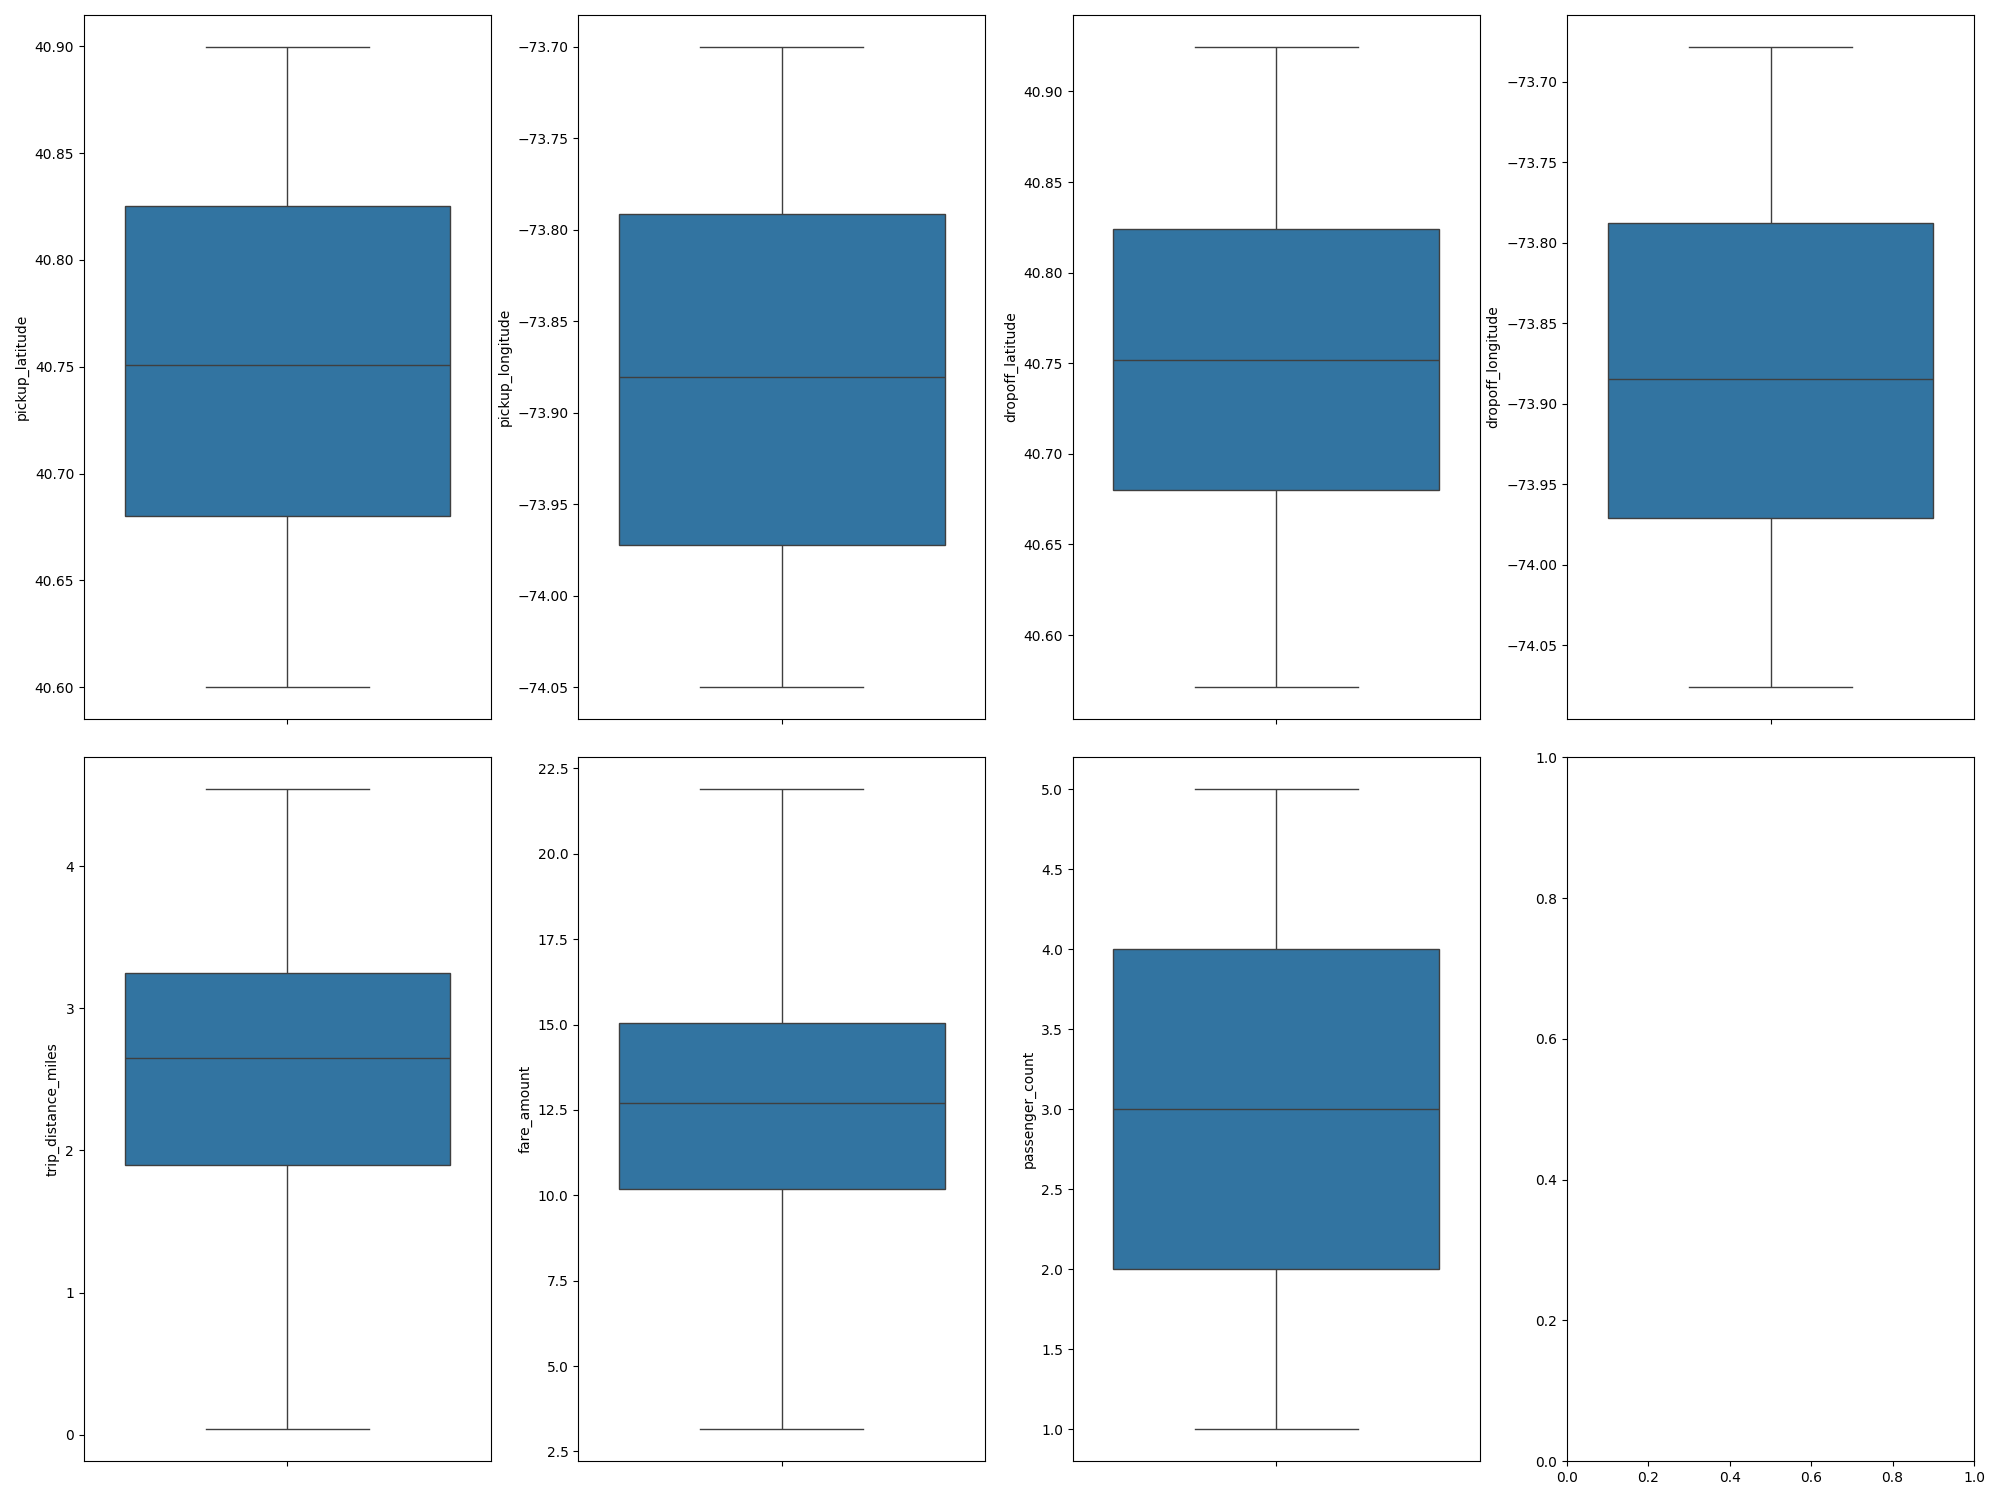

In [10]:
from IPython.display import Image
Image(filename='initial_boxplots_numeric_features.png')

In [13]:
df['fare_per_mile'] = df.apply(
    lambda row: row['fare_amount'] / row['trip_distance_miles'] if row['trip_distance_miles'] > 0 else 0,
    axis=1
)

print(df['fare_per_mile'].describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(df['fare_per_mile'][df['fare_per_mile'] > 0].dropna())
plt.title("Box Plot tarif par mile")
plt.ylabel("tarif par Mile")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('initial_boxplot_fare_per_mile.png')

count    800.000000
mean       5.749083
std        5.906589
min        3.043584
25%        4.251232
50%        4.967206
75%        5.775745
max      131.000000
Name: fare_per_mile, dtype: float64


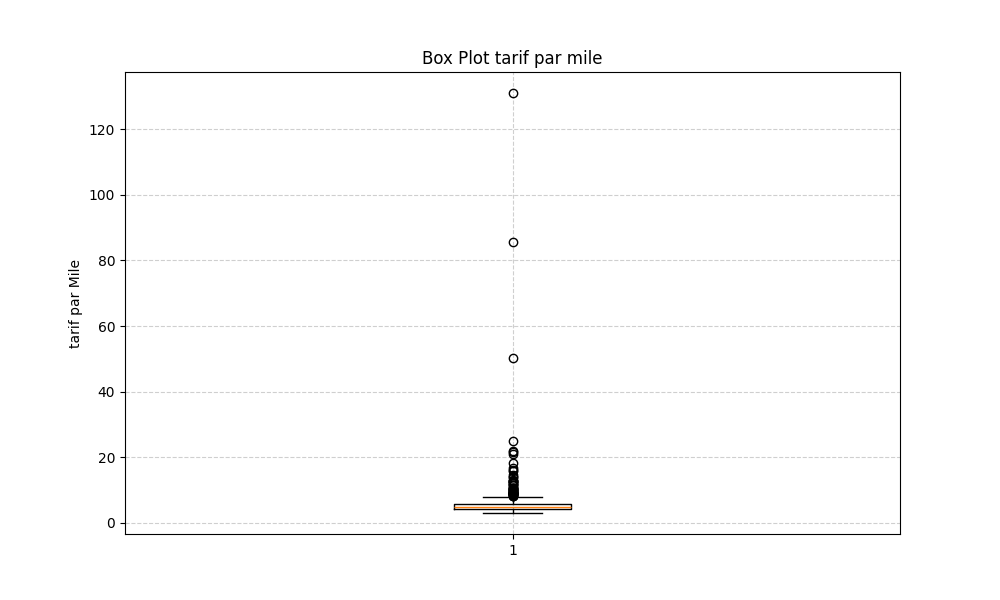

In [12]:
from IPython.display import Image
Image(filename='initial_boxplot_fare_per_mile.png')

In [14]:


# 3. Cohérence du tarif par mile : identification des outliers via IQR
Q1 = df['fare_per_mile'].quantile(0.25)
Q3 = df['fare_per_mile'].quantile(0.75)
IQR = Q3 - Q1

# Définir des bornes pour les outliers (1.5 * IQR est une méthode courante)
lower_bound_fare_per_mile = Q1 - 1.5 * IQR
upper_bound_fare_per_mile = Q3 + 1.5 * IQR

# Assurer que la borne inférieure n'est pas négative, car le tarif par mile doit être positif
lower_bound_fare_per_mile = max(0, lower_bound_fare_per_mile)

# Calculer le pourcentage de 'fare_per_mile' dans la fourchette raisonnable
consistency_fare_per_mile_in_range = (
    (df['fare_per_mile'] >= lower_bound_fare_per_mile) &
    (df['fare_per_mile'] <= upper_bound_fare_per_mile)
).mean() * 100


print(f"\n--- Seuils définis pour 'fare_per_mile' (méthode IQR) ---")
print(f"Q1 (25e percentile): {Q1:.2f}")
print(f"Q3 (75e percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
print(f"Borne inférieure du 'fare_per_mile' (excluant les outliers): {lower_bound_fare_per_mile:.2f}")
print(f"Borne supérieure du 'fare_per_mile' (excluant les outliers): {upper_bound_fare_per_mile:.2f}")
print(f"3. Pourcentage de 'fare_per_mile' dans la fourchette des valeurs consistantes: {consistency_fare_per_mile_in_range:.2f}%")


--- Seuils définis pour 'fare_per_mile' (méthode IQR) ---
Q1 (25e percentile): 4.25
Q3 (75e percentile): 5.78
IQR (Interquartile Range): 1.52
Borne inférieure du 'fare_per_mile' (excluant les outliers): 1.96
Borne supérieure du 'fare_per_mile' (excluant les outliers): 8.06
3. Pourcentage de 'fare_per_mile' dans la fourchette des valeurs consistantes: 93.62%


In [18]:
from datetime import timedelta  
def calculate_speed(row):
    try:
        pickup_time = pd.to_datetime(row['pickup_datetime'])
        dropoff_time = pd.to_datetime(row['dropoff_datetime'])
        trip_distance = row['trip_distance_miles']
        
        if pd.isna(pickup_time) or pd.isna(dropoff_time) or trip_distance <= 0:
            return np.nan
        
        trip_duration = (dropoff_time - pickup_time).total_seconds() / 3600  # durée en heures
        if trip_duration <= 0:
            return np.nan
        
        speed = trip_distance / trip_duration  # vitesse en miles par heure
        return speed
    except Exception as e:
        return np.nan
df['speed_mph'] = df.apply(calculate_speed, axis=1)
print(df['speed_mph'].describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(df['speed_mph'][df['speed_mph'] > 0].dropna())
plt.title("Box Plot vitesse en mph")
plt.ylabel("vitesse en mph")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('initial_boxplot_speed_mph.png')

count    800.000000
mean      10.006991
std       14.050575
min        0.200000
25%        3.273546
50%        5.062151
75%        9.632386
max      120.900000
Name: speed_mph, dtype: float64


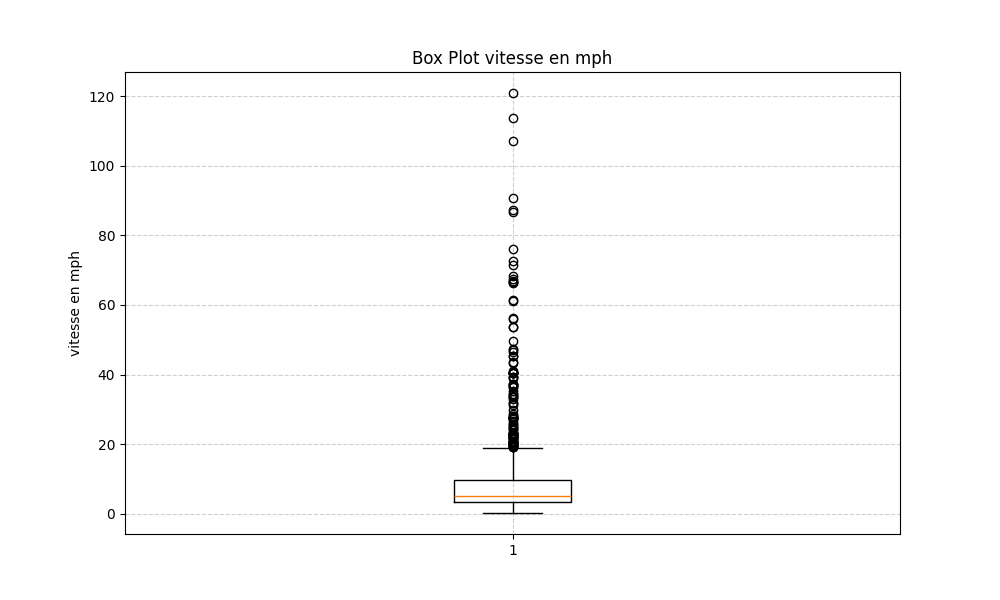

In [19]:
from IPython.display import Image
Image(filename='initial_boxplot_speed_mph.png')

In [16]:


# 3. Cohérence du tarif par mile : identification des outliers via IQR
Q1 = df['speed_mph'].quantile(0.25)
Q3 = df['speed_mph'].quantile(0.75)
IQR = Q3 - Q1

# Définir des bornes pour les outliers (1.5 * IQR est une méthode courante)
lower_bound_speed_mph = Q1 - 1.5 * IQR
upper_bound_speed_mph = Q3 + 1.5 * IQR

# Assurer que la borne inférieure n'est pas négative, car le tarif par mile doit être positif
lower_bound_speed_mph = max(0, lower_bound_speed_mph)

# Calculer le pourcentage de 'speed_mph' dans la fourchette raisonnable
consistency_speed_mph_in_range = (
    (df['speed_mph'] >= lower_bound_speed_mph) &
    (df['speed_mph'] <= upper_bound_speed_mph)
).mean() * 100


print(f"\n--- Seuils définis pour 'speed_mph' (méthode IQR) ---")
print(f"Q1 (25e percentile): {Q1:.2f}")
print(f"Q3 (75e percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
print(f"Borne inférieure du 'speed_mph' (excluant les outliers): {lower_bound_speed_mph:.2f}")
print(f"Borne supérieure du 'speed_mph' (excluant les outliers): {upper_bound_speed_mph:.2f}")
print(f"3. Pourcentage de 'speed_mph' dans la fourchette des valeurs consistantes: {consistency_speed_mph_in_range:.2f}%")


--- Seuils définis pour 'speed_mph' (méthode IQR) ---
Q1 (25e percentile): 3.27
Q3 (75e percentile): 9.63
IQR (Interquartile Range): 6.36
Borne inférieure du 'speed_mph' (excluant les outliers): 0.00
Borne supérieure du 'speed_mph' (excluant les outliers): 19.17
3. Pourcentage de 'speed_mph' dans la fourchette des valeurs consistantes: 86.50%


On constate à travers le profiling:
- une completness total sur nos attributs
- une absence de lignes identiques
- toutes les colonnes de dates sont valides
- La colonne passenger_count a des valeurs toutes comprises [1,5] ce qui est correct
- 
